# Experimentación

## Compilado

In [7]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/schuster/.virtualenvs/metnum/bin/python (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/bruno/Documents/UBA/Metodos_númericos/metodos-tp3
-- Con

## Imports

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import time

from plotly import tools
from plotly.offline import iplot

# Remoción de outliers
from scipy import stats

In [12]:
# Nuestro módulo
import metnum

## Datos

In [13]:
df = pd.read_csv('../data/train.csv')

## Feature engineering

In [ ]:
def addFeatures(df):
    # Nuevas features
    jardin = []
    terraza = []
    seguridad = []
    luminoso = []

    # Procesamiento
    for i in range(len(df)):
        descripcion = df["descripcion"][i]
        if not isinstance(descripcion, str):
            jardin.append(0)
        else:
            palabras = ["jardin","jardín","garden","parque","jard&iacute;"]
            jardin.append(int(any([word in descripcion for word in palabras])))
        if not isinstance(descripcion, str):
            terraza.append(0)
        else:
            palabras = ["terraza"]
            terraza.append(int(any([word in descripcion for word in palabras])))
        if not isinstance(descripcion, str):
            seguridad.append(0)
        else:
            palabras = ["seguridad", "vigilancia", "alarma"]
            seguridad.append(int(any([word in descripcion for word in palabras])))
        if not isinstance(descripcion, str):
            luminoso.append(0)
        else:
            palabras = ["luminoso", "luminosidad", "iluminación", "iluminacion"]
            luminoso.append(int(any([word in descripcion for word in palabras])))

    df.insert(len(list(df))-1, "jardin", jardin, True) 
    df.insert(len(list(df))-1, "terraza", terraza, True) 
    df.insert(len(list(df))-1, "seguridad", seguridad, True) 
    df.insert(len(list(df))-1, "luminoso", luminoso, True) 
    
    return df
            
# Resultados (Sorpresivos)
df = addFeatures(df)

df

In [15]:
# Para trabajar con los cálculos a realizar se necesita utilizar sólo las features con datos numéricos

numeric_cols = df.select_dtypes(include=[np.number]).columns.append(pd.Index(["tipodepropiedad"]))
df_num = df[numeric_cols]
df_num = df_num[df_num['tipodepropiedad'].notnull()]

# Completado de los valores ausentes para no perder entradas de la base de datos
# Se decide reemplazar con la mediana para no afectar a los distintos estadísticos

df_num = df_num.fillna(df_num.median())

df_num

id  antiguedad  habitaciones  garages  banos  metroscubiertos  \
0       254099         5.0           2.0      1.0    2.0             80.0   
1        53461        10.0           3.0      2.0    2.0            268.0   
2       247984         5.0           3.0      2.0    2.0            144.0   
3       209067         1.0           2.0      1.0    1.0             63.0   
4       185997        10.0           2.0      1.0    1.0             95.0   
...        ...         ...           ...      ...    ...              ...   
239995  119879         0.0           2.0      2.0    1.0             67.0   
239996  259178         0.0           3.0      3.0    3.0            200.0   
239997  131932        20.0           2.0      1.0    2.0            138.0   
239998  146867        20.0           4.0      0.0    4.0            235.0   
239999  121958         1.0           3.0      2.0    2.0            149.0   

        metrostotales      idzona        lat        lng  gimnasio  \
0                80.0     23533.0  19.543220 -99.240373       0.0   
1               180.0     24514.0  19.310205 -99.227655       0.0   
2               166.0     48551.0  19.543220 -99.240373       0.0   
3                67.0     53666.0  19.301890 -99.688015       0.0   
4                95.0     47835.0  19.543220 -99.240373       0.0   
...               ...         ...        ...        ...       ...   
239995          155.0     53666.0  19.543220 -99.240373       0.0   
239996          250.0     51954.0  19.294665 -99.692916       0.0   
239997          138.0  50003995.0  19.543220 -99.240373       0.0   
239998          137.0     24162.0  19.366651 -99.082246       1.0   
239999          155.0     23750.0  19.543220 -99.240373       0.0   

        usosmultiples  piscina  escuelascercanas  centroscomercialescercanos  \
0                 0.0      0.0               0.0                         0.0   
1                 0.0      0.0               1.0                         1.0   
2                 0.0      0.0               0.0                         0.0   
3                 0.0      0.0               1.0                         1.0   
4                 0.0      0.0               0.0                         0.0   
...               ...      ...               ...                         ...   
239995            0.0      0.0               0.0                         0.0   
239996            0.0      0.0               1.0                         1.0   
239997            0.0      0.0               0.0                         0.0   
239998            0.0      0.0               1.0                         1.0   
239999            0.0      0.0               0.0                         0.0   

           precio     tipodepropiedad  
0       2273000.0         Apartamento  
1       3600000.0  Casa en condominio  
2       1200000.0                Casa  
3        650000.0                Casa  
4       1150000.0         Apartamento  
...           ...                 ...  
239995   650000.0                Casa  
239996  1940000.0                Casa  
239997  3400000.0         Apartamento  
239998  2890000.0                Casa  
239999  3650000.0         Apartamento  

[239954 rows x 17 columns]

## Comparación de implementaciones

In [58]:
def linearReg(df, x, y):
    #Hago la regresión lineal
    linear_regressor = metnum.LinearRegression() # CHEQUEADO
    #linear_regressor = LinearRegression()

    linear_regressor.fit(x,y)
    #df['prediction'] = linear_regressor.predict(x)
    prediction = linear_regressor.predict(x)

    error = metnum.LossFunctions()
    print("MSE: %f" % (error.meanSquareError(y, prediction)))
    print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
    print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
    print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))
    
    return prediction

In [19]:
def multipleLinearReg(df, x, y):
    #Hago la regresión lineal
    linear_regressor = metnum.LinearRegression()

    #EN
    t0 = time.clock()
    linear_regressor.fitWithNormalEq(x,y)
    #df['predictionNE'] = linear_regressor.predict(x)
    t1 = time.clock()
    print(t1-t0)
    prediction = linear_regressor.predict(x)

    error = metnum.LossFunctions()
    print("MSE: %f" % (error.meanSquareError(y, prediction)))
    print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
    print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
    print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))
    
    #QR
    t0 = time.clock()
    linear_regressor.fitWithQR(x,y)
    #df['predictionQR'] = linear_regressor.predict(x)
    t1 = time.clock()
    print(t1-t0)
    prediction = linear_regressor.predict(x)

    error = metnum.LossFunctions()
    print("MSE: %f" % (error.meanSquareError(y, prediction)))
    print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
    print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
    print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))
    
    #SVD
    t0 = time.clock()
    linear_regressor.fitWithSVD(x,y)
    #df['predictionSVD'] = linear_regressor.predict(x)
    t1 = time.clock()
    print(t1-t0)
    prediction = linear_regressor.predict(x)

    error = metnum.LossFunctions()
    print("MSE: %f" % (error.meanSquareError(y, prediction)))
    print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
    print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
    print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))
    return

In [20]:
def contrastarImp(df):

    # Genero la segmentación según tipo Apartamento
    dfApartamento = df[df["tipodepropiedad"]=="Apartamento"]
    variables = ["antiguedad","habitaciones","banos","metroscubiertos","metrostotales","gimnasio","usosmultiples","piscina","escuelascercanas","centroscomercialescercanos","garages", "precio"]

    dfApartamento = dfApartamento[variables]
    dfApartamento = dfApartamento.fillna(dfApartamento.median())
    print(len(dfApartamento))


    y = dfApartamento['precio'].values
    y = y.reshape(len(y),1)

    #Regresión lineal normal
    x = dfApartamento[["metroscubiertos","metrostotales","garages", "banos"]].values
    x = x.reshape(len(x),4)
    multipleLinearReg(dfApartamento,x,y)
    return

## PCR

In [79]:
def linearRegPCR(df, x, y):
    #Hago la regresión lineal
    linear_regressor = metnum.LinearRegression() # CHEQUEADO
    #linear_regressor = LinearRegression()

    linear_regressor.fit(x,y)
    #df['prediction'] = linear_regressor.predict(x)
    prediction = linear_regressor.predict(x)

    return prediction

def getErrors(predictions, observed):
    error = metnum.LossFunctions()
    
    print("MSE   : %f" % (error.meanSquareError(observed, predictions)))
    print("MAE   : %f" % (error.meanAbsoluteError(observed, predictions)))
    print("RMSE  : %f" % (error.rootMeanSquareError(observed, predictions)))
    print("RMSLE : %f" % (error.rootMeanSquareLogError(observed, predictions)))
    
    return

In [82]:
#TODO: Meter en un dataframe y hacer gráficos

def pcr(df):
    #modelo = forwardSelectionPCR(df, ["precio"])
    #modelo = ['metroscubiertos', 'garages', 'gimnasio', 'habitaciones', 'banos', 'metrostotales', 'lat', 'idzona']    
    
    modelo = dfApartamento.columns.to_list()
    modelo.pop(-1)

    y = df['precio'].values
    y = y.reshape(len(y),1)
    
    for cantFeatures in range(1, len(modelo)):
        
        #Regresión lineal normal
        x = df[modelo[:cantFeatures]].values
        x = x.reshape(len(x),cantFeatures)
        print("Resultados para Regresión lineal con %s features" % cantFeatures)
        
        predictions = linearRegPCR(df,x,y)

        dfPred = df.copy()
        dfPred['prediction'] = predictions
        dfPred = dfPred[dfPred["prediction"] >= 0]

        observed = dfPred['precio'].values
        observed = observed.reshape(len(observed),1)

        predictions = dfPred['prediction'].values
        predictions = predictions.reshape(len(predictions),1)

        getErrors(predictions, observed)


        #Aplicar PCA
        x = df[modelo].values
        x = x.reshape(len(x),len(modelo))
        
        pca = metnum.PCA(cantFeatures) #Habría que ver primero cuántos son necesarios para acumular buena varianza. Ver TP anterior
        pca.fit(x)
        x = pca.transform(x)
        print("Resultados para PCR con %s features" % cantFeatures)
        predictions = linearRegPCR(df,x,y)

        dfPred = df.copy()
        dfPred['prediction'] = predictions
        dfPred = dfPred[dfPred["prediction"] >= 0]

        observed = dfPred['precio'].values
        observed = observed.reshape(len(observed),1)

        predictions = dfPred['prediction'].values
        predictions = predictions.reshape(len(predictions),1)

        getErrors(predictions, observed)
        
    return


In [83]:
dfApartamento = df[df["tipodepropiedad"]=="Apartamento"]
dfApartamento = dfApartamento.select_dtypes(['number'])
dfApartamento = dfApartamento.drop(['id'], axis=1)
dfApartamento = dfApartamento.fillna(dfApartamento.median())

features = dfApartamento.columns.to_list()
features.pop(-1)
xOut, yOut, dfApartamento = removeOutliers(dfApartamento, features, ['precio'])

pcr(dfApartamento)

Resultados para Regresión lineal con 1 features
MSE   : 7693052232452.437500
MAE   : 2114663.499416
RMSE  : 2773635.201762
RMSLE : 6.539551
Resultados para PCR con 1 features
MSE   : 8789406472222.924805
MAE   : 2288568.210171
RMSE  : 2964693.318410
RMSLE : 6.220848
Resultados para Regresión lineal con 2 features
MSE   : 3311775075836.095215
MAE   : 1405443.752819
RMSE  : 1819828.309439
RMSLE : 0.819292
Resultados para PCR con 2 features
MSE   : 2300216145256.258301
MAE   : 1208061.288587
RMSE  : 1516646.348117
RMSLE : 0.734050
Resultados para Regresión lineal con 3 features
MSE   : 2661340554645.248047
MAE   : 1233365.972432
RMSE  : 1631361.564659
RMSLE : 0.757617
Resultados para PCR con 3 features
MSE   : 1735992479340.230469
MAE   : 966721.281358
RMSE  : 1317570.673376
RMSLE : 0.562192
Resultados para Regresión lineal con 4 features
MSE   : 2102153942983.742920
MAE   : 1065489.581352
RMSE  : 1449880.665084
RMSLE : 0.618503
Resultados para PCR con 4 features
MSE   : 1725352282859.473

In [50]:
from sklearn.linear_model import LinearRegression

# Genero la segmentación según tipo Apartamento
dfApartamento = df[df["tipodepropiedad"]=="Apartamento"]
variables = ["antiguedad","habitaciones","banos","metroscubiertos","metrostotales","gimnasio","usosmultiples","piscina","escuelascercanas","centroscomercialescercanos","garages", "precio"]

dfApartamento = dfApartamento[variables]
df_sin_na = dfApartamento.dropna()
dfApartamento = dfApartamento.fillna(dfApartamento.median())
print(len(dfApartamento))
print(len(df_sin_na))


y = dfApartamento['precio'].values
y = y.reshape(len(y),1)


#Regresión lineal normal
x = dfApartamento[["metroscubiertos","metrostotales","garages", "banos"]].values
x = x.reshape(len(x),4)
linearReg(dfApartamento,x,y)


#Aplicar PCA
dfApartamento.drop(columns=['prediction'])
x = dfApartamento[["antiguedad","habitaciones","banos","metroscubiertos","metrostotales","gimnasio","usosmultiples","piscina","escuelascercanas","centroscomercialescercanos","garages"]].values #MAL, ACÁ HAY QUE POENR TODAS LAS COLS MENOS EL PRECIO
                  
x = x.reshape(len(x),11)
pca = metnum.PCA(4) #Habría que ver primero cuántos son necesarios para acumular buena varianza. Ver TP anterior
pca.fit(x)
x = pca.transform(x)
predPCA = linearReg(dfApartamento, x,y)

57341
22972
MSE: 2455165093204.130371
MAE: 1135737.728112
RMSE: 1566896.644072
RMSLE: 0.614024
MSE: 2666563202879.438477
MAE: 1228652.394974
RMSE: 1632961.482362
RMSLE: 0.684554


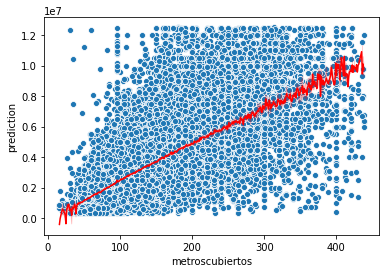

In [37]:
sns.scatterplot(data=dfApartamento, x='metroscubiertos', y='precio')
sns.lineplot(data=dfApartamento, x='metroscubiertos', y='prediction', color='red')

## Remoción de outliers

Nos fijamos si la mejor combinación para obtener las mejores métricas evitando los NaN y los outliers

In [55]:
def removeOutliers(df, features, target):
    df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    
    x_zscore = df_zscore[features].values
    y_zscore = df_zscore[target].values

    x_zscore = x_zscore.reshape(len(x_zscore),len(features))
    y_zscore = y_zscore.reshape(len(y_zscore),len(target))
    
    x = pd.DataFrame(data=x_zscore, columns=features)
    y = pd.DataFrame(data=y_zscore, columns=target)
    
    return x, y, pd.concat([x,y], axis = 1, sort = False)

In [31]:
dfApartamento = df[df["tipodepropiedad"]=="Apartamento"]
variables = ["antiguedad","habitaciones","banos","metroscubiertos","metrostotales","gimnasio","usosmultiples","piscina","escuelascercanas","centroscomercialescercanos","garages", "precio"]

dfApartamento = dfApartamento[variables]
dfsinNan = dfApartamento.dropna()
dfApartamento = dfApartamento.fillna(dfApartamento.median())

#Con NAN
xOut, yOut = removeOutliers(dfApartamento, variables, ['precio'])

y = dfApartamento['precio'].values
y = y.reshape(len(y),1)

x = dfApartamento[["metroscubiertos","metrostotales","garages", "banos"]].values
x = x.reshape(len(x),4)
print("Rellenando NAN sin descartar outliers")
linearReg(dfApartamento,x,y)


yOut = yOut['precio'].values
y = yOut.reshape(len(yOut),1)

x = xOut[["metroscubiertos","metrostotales","garages", "banos"]].values
x = x.reshape(len(x),4)

print("Rellenando NAN quitando outliers")
linearReg(xOut,x,y)


#Sin NAN
dfApartamento = dfsinNan

xOut, yOut = removeOutliers(dfApartamento, variables, ['precio'])

y = dfApartamento['precio'].values
y = y.reshape(len(y),1)

x = dfApartamento[["metroscubiertos","metrostotales","garages", "banos"]].values
x = x.reshape(len(x),4)

print("Quitando NAN sin descartar outliers")
linearReg(dfApartamento,x,y)


yOut = yOut['precio'].values
y = yOut.reshape(len(yOut),1)

x = xOut[["metroscubiertos","metrostotales","garages", "banos"]].values
x = x.reshape(len(x),4)

print("Quitando NAN y quitando outliers")
linearReg(xOut,x,y)

Rellenando NAN sin descartar outliers
MSE: 2406405375821.548340
MAE: 1146449.366486
RMSE: 1551259.287102
RMSLE: 0.630049
Rellenando NAN quitando outliers
MSE: 1763427563751.026611
MAE: 1013020.105676
RMSE: 1327941.099504
RMSLE: 0.605520
Quitando NAN sin descartar outliers
MSE: 2095085980337.793457
MAE: 1068946.022444
RMSE: 1447441.183723
RMSLE: 0.639037
Quitando NAN y quitando outliers
MSE: 1517937859932.600098
MAE: 948206.942320
RMSE: 1232046.208522
RMSLE: 0.620768


In [13]:
# Genero los dataframes de cada tipo de propiedad 

tipos = df["tipodepropiedad"].unique()
dataframes = {}

for tipo in tipos:
    dataframes[tipo] = df[df["tipodepropiedad"]==tipo]

del dataframes[list(dataframes)[-5]]
    
#for tipo in dataframes:
#    print('{0:29} : {1}'.format(tipo, len(dataframes[tipo])))    

df["tipodepropiedad"].value_counts()
print(len(df))
    

239954


## Segmentación

In [16]:
urbano = ['Apartamento', 'Casa en condominio', 'Casa', 'Edificio', 'Casa uso de suelo', 'Departamento Compartido']
comercial = ['Terreno comercial', 'Local Comercial', 'Oficina comercial', 'Local en centro comercial', 'Bodega comercial']
industrial = ['Nave industrial', 'Terreno industrial']
terreno = ['Terreno', 'Terreno comercial', 'Terreno industrial']
casa = ['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Duplex']
depto = ['Apartamento']

print(urbano)
print(comercial)
print(industrial)

print()

print(terreno)
print(casa)
print(depto)

['Apartamento', 'Casa en condominio', 'Casa', 'Edificio', 'Casa uso de suelo', 'Departamento Compartido']
['Terreno comercial', 'Local Comercial', 'Oficina comercial', 'Local en centro comercial', 'Bodega comercial']
['Nave industrial', 'Terreno industrial']

['Terreno', 'Terreno comercial', 'Terreno industrial']
['Casa en condominio', 'Casa', 'Casa uso de suelo', 'Duplex']
['Apartamento']


In [17]:
upper = df["precio"].max()
lower = df["precio"].min()

df["categoria"] = (df["precio"]-lower)//((upper+1-lower)/3)

df

id                                             titulo  \
0       254099                                  depto. tipo a-402   
1        53461                     condominio horizontal en venta   
2       247984              casa en venta urbi 3 recamaras tonala   
3       209067  casa sola en toluca zinacantepec con credito i...   
4       185997                                     paseos del sol   
...        ...                                                ...   
239995  119879  bonita casas de 2 recamaras a 10 minutos del c...   
239996  259178  casa en condominio a 10 min. del centro de toluca   
239997  131932                                   nicolas san juan   
239998  146867                      casa sola. javier rojo gomez.   
239999  121958  departamento en bosques de las lomas  / av. st...   

                                              descripcion     tipodepropiedad  \
0       depto. interior de 80.15m2, consta de sala com...         Apartamento   
1       <p>entre sonora y guerrero, atr&aacute;s del h...  Casa en condominio   
2       descripcion \nla mejor ubicacion residencial e...                Casa   
3       casa en privada con caseta de vigilancia casas...                Casa   
4       bonito departamento en excelentes condiciones ...         Apartamento   
...                                                   ...                 ...   
239995  vendo casa en bosques de ica residencial a 10 ...                Casa   
239996  casa con un jardin amplio, un cuarto de servic...                Casa   
239997  departamento con excelente ubicación, muy cerc...         Apartamento   
239998  casa sola, dividida en cuatro departamentos de...                Casa   
239999  id:19816, muy bonito e iluminado departamento,...         Apartamento   

                              direccion                  ciudad  \
0       Avenida Division del Norte 2005           Benito Juárez   
1                            AV. MEXICO  La Magdalena Contreras   
2                           Urbi Tonala                  Tonalá   
3         IGNACIO MANUEL ALTAMIRANO 128            Zinacantepec   
4                       PASEOS DEL SOL                  Zapopan   
...                                 ...                     ...   
239995                          BOSQUES            Zinacantepec   
239996              Filiberto Navas 325                  Toluca   
239997                 Nicolas San Juan           Benito Juárez   
239998            Javier Rojo Gomez 120              Iztapalapa   
239999                        AVE. STIM   Cuajimalpa de Morelos   

               provincia  antiguedad  habitaciones  garages  ...  \
0       Distrito Federal         NaN           2.0      1.0  ...   
1       Distrito Federal        10.0           3.0      2.0  ...   
2                Jalisco         5.0           3.0      2.0  ...   
3         Edo. de México         1.0           2.0      1.0  ...   
4                Jalisco        10.0           2.0      1.0  ...   
...                  ...         ...           ...      ...  ...   
239995    Edo. de México         0.0           2.0      2.0  ...   
239996    Edo. de México         0.0           3.0      3.0  ...   
239997  Distrito Federal        20.0           2.0      1.0  ...   
239998  Distrito Federal        20.0           4.0      0.0  ...   
239999  Distrito Federal         1.0           3.0      2.0  ...   

        usosmultiples  piscina  escuelascercanas  centroscomercialescercanos  \
0                 0.0      0.0               0.0                         0.0   
1                 0.0      0.0               1.0                         1.0   
2                 0.0      0.0               0.0                         0.0   
3                 0.0      0.0               1.0                         1.0   
4                 0.0      0.0               0.0                         0.0   
...               ...      ...               ...                         ...   
239995            0.0      0

## Inseguridad

In [10]:
# Agregamos información de una base de datos externa
df_indices_seg = df[["provincia","fecha"]]
df_indices_seg = df_indices_seg[(~df_indices_seg.isnull()).all(axis=1)]

print (df_indices_seg.count())

provincia    239845
fecha        239845
dtype: int64


In [11]:
# Percepción de la seguridad por Provincia (Estado)

# Marzo-abril de 2012
indice_2012 = [46.5,51.6,24.4,44.6,74.6,70.8,37.9,82.7,70.8,81.8,54.1,74.4,49.2,61.5,84.5,76.0,81.2,72.9,86.7,60.7,57.1,29.4,59.9,60.0,77.4,42.4,71.2,82.9,40.1,70.0,19.2,80.5]

# Marzo-abril de 2013
indice_2013 = [45.4,46.4,69.2,40.2,16.9,28.2,45.7,18.5,26.2,19.5,37.9,9.6,39.3,23.3,8.3,16.5,12.5,42.6,19.6,31.1,32.1,55.9,27.7,19.3,21.4,47.3,15.0,13.5,45.8,22.0,67.0,14.6]

# Marzo-abril de 2014
indice_2014 = [48.2,41.5,59.0,38.7,19.9,41.7,36.0,22.2,22.1,23.6,31.8,18.9,31.5,31.0,6.4,16.3,10.6,47.1,25.6,20.6,34.0,59.3,30.4,24.9,26.5,41.6,13.2,13.4,36.6,16.9,69.6,18.5]

# Marzo-abril de 2015. En este caso contamos con un intervalo de confianza del 90%. El formato es: (lim inf, lim sup)
indice_2015_con_limites = [(62.2,67.1),(55.6,59.7),(59.1,63.1),(60.8,65.8),(62.1,66.4),(65.2,69.0),(65.7,69.6),(69.7,73.6),(48.6,53.7),(64.6,68.5),(47.5,52.6),(56.5,61.5),(54.5,59.5),(58.1,62.4),(31.5,36.0),(62.0,65.6),(43.6,48.0),(71.0,75.8),(57.9,61.7),(59.6,64.8),(54.2,57.9),(54.2,58.6),(54.6,59.0),(60.8,65.8),(66.2,69.9),(55.7,61.4),(35.9,40.3),(57.2,61.0),(50.5,55.3),(55.0,59.0),(64.4,68.4),(59.4,64.7)]
indice_2015 = []
for t in indice_2015_con_limites :
    indice_2015.append((t[0]+t[1])/2)
    
# Marzo-abril de 2016. En este caso contamos con un intervalo de confianza del 90%. El formato es: (lim inf, lim sup)
indice_2016_con_limites = [(58.4,63.6),(54.2,58.3),(66.5,70.1),(60.1,64.3),(68.6,72.4),(52.7,56.4),(63.5,67.2),(69.2,73.6),(40.4,45.4),(70.2,73.5),(49.5,54.6),(56.6,61.3),(56.4,61.1),(54.7,59.2),(30.0,34.1),(64.0,68.2),(43.6,48.2),(75.7,79.4),(59.2,63.2),(62.0,66.9),(46.6,50.4),(50.9,55.2),(53.7,57.9),(60.4,66.2),(69.7,73.3),(56.6,62.1),(33.7,38.0),(56.5,60.3),(54.3,58.5),(53.1,57.3),(64.4,68.0),(58.3,63.5)]
indice_2016 = []
for t in indice_2016_con_limites :
    indice_2016.append((t[0]+t[1])/2)

# Estados en el orden que aparecen los datos en cada índice
estados = ["Aguascalientes","Baja California Norte","Baja California Sur","Campeche","Coahuila","Colima","Chiapas","Chihuahua","Distrito Federal","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","Edo. de México","Michoacán","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz","Yucatán","Zacatecas"]

In [12]:
lista = []
indice_inseguridad = []

for index, row in df_indices_seg.iterrows():
    lista.append((row["provincia"],row["fecha"]))

for i in range(len(lista)):
    if("2012" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_inseguridad.append(indice_2012[j])
                break
                
    elif("2013" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_inseguridad.append(indice_2013[j])
                break

    elif("2014" in lista[i][1]):    
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_inseguridad.append(indice_2014[j])
                break
                
    elif("2015" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_inseguridad.append(indice_2015[j])
                break
                
    elif("2016" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_inseguridad.append(indice_2016[j])
                break
                
print(len(indice_inseguridad))

239845


In [13]:
df_indices_seg["inseguridad"] = indice_inseguridad
df_indices_seg

provincia                fecha  inseguridad
0       Distrito Federal  2015-08-23 00:00:00        51.15
1       Distrito Federal  2013-06-28 00:00:00        26.20
2                Jalisco  2015-10-17 00:00:00        60.25
3         Edo. de México  2012-03-09 00:00:00        84.50
4                Jalisco  2016-06-07 00:00:00        56.95
...                  ...                  ...          ...
239995    Edo. de México  2015-02-08 00:00:00        33.75
239996    Edo. de México  2014-07-10 00:00:00         6.40
239997  Distrito Federal  2015-03-03 00:00:00        51.15
239998  Distrito Federal  2014-12-26 00:00:00        22.10
239999  Distrito Federal  2015-06-19 00:00:00        51.15

[239845 rows x 3 columns]

In [18]:
# CALCULAMOS CON LA TASA MEDIA DE CRECIMIENTO POBLACIONAL ENTRE 2010-2015
# LA POBLACION DEL 2010, LA POBLACION DE CADA AÑO
poblacion_total_2010 = [1184996,3155070,637026,822441,2748391,650555,4796580,3406465,8851080,1632934,5486372,3388768,2665018,7350682,1517862,4351037,1777227,1084979,4653458,3801962,5779829,1827937,1325578,2585518,2767761,2662480,2238603,3268554,1169936,7643194,1955577,1490668]
tasa_de_crecimiento = [2.2,1.3,2.6,2,1.6,2,1.8,1,0.3,1.6,1.4,0.9,1.5,1.5,1.4,1.2,1.6,1.9,2.1,0.9,1.4,2.4,2.7,1.1,1.5,1.6,1.5,1.2,1.8,1.3,1.5,1.3]

def obtener_poblacion(n):
    poblacion = []
    for i in range(len(poblacion_total_2010)):
        poblacion.append(poblacion_total_2010[i] * tasa_de_crecimiento[i]*n)
        
    return poblacion

poblacion_total_2012 = obtener_poblacion(2)
poblacion_total_2013 = obtener_poblacion(3)
poblacion_total_2014 = obtener_poblacion(4)
poblacion_total_2015 = obtener_poblacion(5)
poblacion_total_2016 = obtener_poblacion(6)

print(poblacion_total_2013)

[7820973.600000001, 12304773.0, 4968802.800000001, 4934646, 13192276.8, 3903330, 25901532.0, 10219395, 7965972.0, 7838083.200000001, 23042762.4, 9149673.600000001, 11992581.0, 33078069.0, 6375020.399999999, 15663733.2, 8530689.600000001, 6184380.3, 29316785.400000002, 10265297.4, 24275281.799999997, 13161146.399999999, 10737181.8, 8532209.4, 12454924.5, 12779904.0, 10073713.5, 11766794.399999999, 6317654.4, 29808456.6, 8800096.5, 5813605.2]


In [21]:
# Datos de infracciones registradas por intervenciones de la policía por Provincia (Estado)
def regularizacion_de_infracciones(poblacion_total, infracciones):
    rv = []
    for i in range(len(infracciones)) :
        #el dato que ingresamos es la cantidad de infracciones cada 1000 habitantes
        rv.append(infracciones[i] * 1000 / poblacion_total[i])
    return rv


# 2012
infracciones_2012 = [ 4474, 5046, 6208, 6907, 2079, 6008, 7918, 7942,1046967,  878, 5137, 3635, 38833, 2982, 33949, 11528, 4416, 16840, 8141, 8081,  835, 3190, 4403, 15979,  455,  649, 5025, 1701, 2934, 11810, 19653,  130]
infracciones_2012 = regularizacion_de_infracciones(poblacion_total_2012, infracciones_2012)

# 2013 
infracciones_2013 = [ 19985, 4618, 9423, 19957, 1494, 6011, 11319, 4797,1200784,  626,1329, 6263, 43471, 2793, 31583, 9257, 4455, 3180, 15841, 11090, 8395, 4392, 3646, 19562, 3654, 1732, 4854, 22072, 1753, 12056, 20826,  140]
infracciones_2013 = regularizacion_de_infracciones(poblacion_total_2013, infracciones_2013)

# 2014
infracciones_2014 = [ 19617, 4232,  946, 26561, 12621, 4727, 9187, 5278, 592135, 5525, 1090, 4013, 38962, 2391, 36331, 9994, 6335,  902, 10078, 8374, 4389, 1206, 4077, 26382,  701, 2871, 4011, 25356, 2310, 14498, 22606,  175]
infracciones_2014 = regularizacion_de_infracciones(poblacion_total_2014, infracciones_2014)

# 2015
infracciones_2015 = [ 19729, 3106, 1188, 26980, 22375, 6388, 8816, 6208, 198094, 16017, 1174, 3895, 32931, 3569, 25357, 3920, 10969, 2148, 10618, 5931, 1822, 1708, 3404, 22169,  735, 1833, 6719, 29556, 3810, 16538, 264264,  216]
infracciones_2015 = regularizacion_de_infracciones(poblacion_total_2015, infracciones_2015)

# 2016
infracciones_2016 = [ 69886, 2652,  796, 21101, 19304, 4547, 8799, 8525, 205320, 23752, 93899, 13552, 5548, 3459, 34539, 44615, 29294,  476, 9082, 6809, 1649, 36824, 12806, 20372,  707, 1365, 10846, 34944, 3945, 17176, 260592,  224]
infracciones_2016 = regularizacion_de_infracciones(poblacion_total_2016, infracciones_2016)

# Estados
estados = ["Aguascalientes","Baja California Norte","Baja California Sur","Campeche","Coahuila","Colima","Chiapas","Chihuahua","Distrito Federal","Durango","Guanajuato","Guerrero","Hidalgo","Jalisco","Edo. de México","Michoacán","Morelos","Nayarit","Nuevo León","Oaxaca","Puebla","Querétaro","Quintana Roo","San luis Potosí","Sinaloa","Sonora","Tabasco","Tamaulipas","Tlaxcala","Veracruz","Yucatán","Zacatecas"]
print(infracciones_2012)

[1165.3961555654896, 1625.680142687277, 533.5913659793815, 476.2941942956421, 4230.327657527658, 433.1258322237017, 2180.8143470573377, 857.8355577940066, 5.072412024447762, 5951.467881548976, 2990.4305236519367, 1678.0694360385146, 205.88298612005252, 7395.0523138833, 125.1881822734101, 905.8369882026369, 1287.845652173913, 244.82899049881235, 2400.7521926053314, 846.8669224105928, 19381.46251497006, 2750.5008150470217, 1625.7372700431524, 355.9759434257463, 18248.973626373627, 13127.790446841294, 1336.4794029850746, 4611.716402116402, 1435.5042944785278, 1682.6676037256564, 298.515799114639, 29813.36]


In [22]:
lista = []
indice_infracciones = []

for index, row in df_indices_seg.iterrows():
    lista.append((row["provincia"],row["fecha"]))

for i in range(len(lista)):
    if("2012" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_infracciones.append(infracciones_2012[j])
                break
                
    elif("2013" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_infracciones.append(infracciones_2013[j])
                break

    elif("2014" in lista[i][1]) :
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_infracciones.append(infracciones_2014[j])
                break
                
    elif("2015" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_infracciones.append(infracciones_2015[j])
                break
                
    elif("2016" in lista[i][1]):
        for j in range(len(estados)):
            if estados[j].lower() in lista[i][0].lower():
                indice_infracciones.append(infracciones_2016[j])
                break
                
print(len(indice_infracciones))

NameError: name 'estados' is not defined

In [23]:
df_indices_seg["indice_infracciones"] = indice_infracciones
df_indices_seg

provincia                fecha  inseguridad  \
0       Distrito Federal  2015-08-23 00:00:00        51.15   
1       Distrito Federal  2013-06-28 00:00:00        26.20   
2                Jalisco  2015-10-17 00:00:00        60.25   
3         Edo. de México  2012-03-09 00:00:00        84.50   
4                Jalisco  2016-06-07 00:00:00        56.95   
...                  ...                  ...          ...   
239995    Edo. de México  2015-02-08 00:00:00        33.75   
239996    Edo. de México  2014-07-10 00:00:00         6.40   
239997  Distrito Federal  2015-03-03 00:00:00        51.15   
239998  Distrito Federal  2014-12-26 00:00:00        22.10   
239999  Distrito Federal  2015-06-19 00:00:00        51.15   

        indice_infracciones  
0                 67.021818  
1                  6.633976  
2              15446.936117  
3                125.188182  
4              19125.798786  
...                     ...  
239995           419.017786  
239996           233.960728  
239997            67.021818  
239998            17.937288  
239999            67.021818  

[239845 rows x 4 columns]

## Mapas

In [21]:
df_map = df.dropna()

fig = px.scatter_mapbox(df_map, lat="lat", lon="lng", color="precio", size="precio",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=5,
                  mapbox_style="carto-positron")
fig.show()

## Scatter

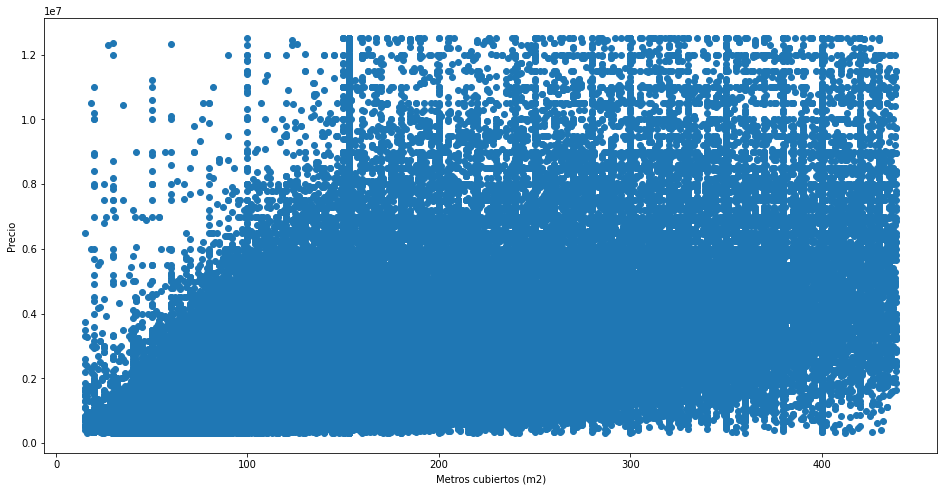

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_num['metroscubiertos'], df_num['precio'])
ax.set_xlabel('Metros cubiertos (m2)')
ax.set_ylabel('Precio')
plt.show()

## Predicciones

In [ ]:
linear_regressor = LinearRegression()
linear_robust = LinearRegression()

#linear_regressor = metnum.LinearRegression() # CHEQUEADO
#linear_robust = metnum.LinearRegression() # CHEQUEADO

linear_regressor.fit(x,y)
linear_robust.fit(x_zscore,y_zscore)

df['prediction'] = linear_regressor.predict(x)
prediction = linear_regressor.predict(x)

# Con remoción de outliers
df_zscore['prediction'] = linear_robust.predict(x_zscore)
prediction_robust = linear_robust.predict(x_zscore)


# Errores
error = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y, prediction)))
print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))

error_robust = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y_zscore, prediction_robust)))
print("MAE: %f" % (error.meanAbsoluteError(y_zscore, prediction_robust)))
print("RMSE: %f" % (error.rootMeanSquareError(y_zscore, prediction_robust)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y_zscore, prediction_robust)))

In [ ]:
# Datos crudos
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')

In [ ]:
# Con remoción de outliers
sns.scatterplot(data=df_zscore, x='metroscubiertos', y='precio')
sns.lineplot(data=df_zscore, x='metroscubiertos', y='prediction', color='red')